In [108]:
import pandas as pd
import numpy as np
from scipy import stats
from fitter import Fitter
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date,datetime,time
from analytics_tools3 import freq_discrete
%matplotlib inline

In [109]:
df = pd.read_csv('BPD_Arrests.csv.gz')

In [110]:
df.dropna(inplace=True)

In [111]:
df.shape

(68151, 15)

In [112]:
df = df[['Age','Sex','Race','ArrestDate','ArrestTime','ChargeDescription']]

In [113]:
df.ArrestDate = pd.to_datetime(df.ArrestDate).dt.date

In [114]:
df.head()

,Age,Sex,Race,ArrestDate,ArrestTime,ChargeDescription
0,54.0,M,B,2016-11-12,22:35,COMMON ASSAULT
1,22.0,M,B,2016-11-12,21:49,POSSESSION
8,46.0,M,A,2016-11-12,15:37,TRESPASSING
9,20.0,M,U,2016-11-12,15:30,COMMON ASSAULT
12,22.0,M,B,2016-11-12,13:55,COMMON ASSAULT


In [115]:
freq_discrete(df,'Sex')

Frequency distribution table for variable: Sex


    Freq       Pct  Accum Freq  Accum Pct
M  55768  0.818301       55768   0.818301
F  12383  0.181699       68151   1.000000




In [116]:
aux = pd.DataFrame({'sex_sim':np.random.choice(['M','F'],
                              p=[0.818301,0.181699],
                              size=68000)})

freq_discrete(aux,'sex_sim')

Frequency distribution table for variable: sex_sim


    Freq       Pct  Accum Freq  Accum Pct
M  55660  0.818529       55660   0.818529
F  12340  0.181471       68000   1.000000




In [117]:
freq_discrete(df,'Race',True)

Frequency distribution table for variable: Race


    Freq       Pct  Accum Freq  Accum Pct
B  56373  0.827178       56373   0.827178
W  10286  0.150930       66659   0.978107
U   1156  0.016962       67815   0.995070
A    181  0.002656       67996   0.997726
I    155  0.002274       68151   1.000000




In [118]:
def agrupar_raza(raza):
    if raza in ['B','W']:
        return raza
    else:
        return 'O'

In [119]:
df['Race'] = df['Race'].map(agrupar_raza)

In [120]:
df['Race'] = df['Race'].map(lambda x:x if x in ['B','W'] else 'O')

In [121]:
freq_discrete(df,'Race',True)

Frequency distribution table for variable: Race


    Freq       Pct  Accum Freq  Accum Pct
B  56373  0.827178       56373   0.827178
W  10286  0.150930       66659   0.978107
O   1492  0.021893       68151   1.000000




In [122]:
df.head()

,Age,Sex,Race,ArrestDate,ArrestTime,ChargeDescription
0,54.0,M,B,2016-11-12,22:35,COMMON ASSAULT
1,22.0,M,B,2016-11-12,21:49,POSSESSION
8,46.0,M,O,2016-11-12,15:37,TRESPASSING
9,20.0,M,O,2016-11-12,15:30,COMMON ASSAULT
12,22.0,M,B,2016-11-12,13:55,COMMON ASSAULT


In [123]:
def conv_time(x):
    try:
        x = x.replace('.',':')
        l = [int(y) for y in x.split(':')]
        return time(l[0],l[1])
    except:
        print x

In [124]:
def horario(x):
    if time(0,0)<=x<=time(6,0):
        return '01. mad'
    elif time(6,0)<x<=time(12,0):
        return '02. mañ'
    elif time(12,0)<x<=time(18,0):
        return '03. tar'
    elif time(18,0)<x<=time(23,59):
        return '04. noc'
    

In [125]:
df['horario'] = df['ArrestTime'].map(conv_time).map(horario)

In [127]:
freq_discrete(df,'horario',False)

Frequency distribution table for variable: horario


          Freq       Pct  Accum Freq  Accum Pct
01. mad   9894  0.145178        9894   0.145178
02. mañ  13525  0.198456       23419   0.343634
03. tar  22222  0.326070       45641   0.669704
04. noc  22510  0.330296       68151   1.000000




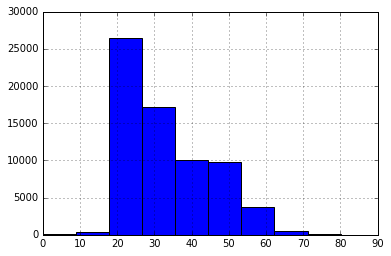

In [129]:
df.Age.hist()

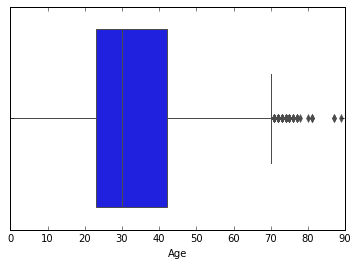

In [130]:
sns.boxplot(df.Age)

[23.0, 42.0, 32.89697876773635]

In [ ]:
<=x<=(l[2]-3*riq)

In [147]:
l = pd.DataFrame(df.Age.describe()).T[['25%','75%','mean']].T['Age'].tolist()
riq = l[1]-l[0]
lb=l[2]-1.5*riq
ub =l[2]+1.5*riq
df['ol_riq']= ((df.Age<lb)|(df.Age>ub)).astype(int)

In [148]:
df.head()

,Age,Sex,Race,ArrestDate,ArrestTime,ChargeDescription,horario,ol_riq
0,54.0,M,B,2016-11-12,22:35,COMMON ASSAULT,04. noc,0
1,22.0,M,B,2016-11-12,21:49,POSSESSION,04. noc,0
8,46.0,M,O,2016-11-12,15:37,TRESPASSING,03. tar,0
9,20.0,M,O,2016-11-12,15:30,COMMON ASSAULT,03. tar,0
12,22.0,M,B,2016-11-12,13:55,COMMON ASSAULT,03. tar,0


In [149]:
freq_discrete(df,'ol_riq')

Frequency distribution table for variable: ol_riq


    Freq       Pct  Accum Freq  Accum Pct
0  67332  0.987983       67332   0.987983
1    819  0.012017       68151   1.000000




In [159]:
lb,ub=list(pd.DataFrame(df.Age.describe(percentiles=[.01,.99])).T[['1%','99%']].T['Age'])

In [161]:
df['ol_pct']= ((df.Age<lb)|(df.Age>ub)).astype(int)

In [163]:
freq_discrete(df,'ol_pct')

Frequency distribution table for variable: ol_pct


    Freq       Pct  Accum Freq  Accum Pct
0  67180  0.985752       67180   0.985752
1    971  0.014248       68151   1.000000




In [164]:
df['olol'] = df.ol_riq.astype(str)+df.ol_pct.astype(str)

In [168]:
freq_discrete(df,'olol',True)

Frequency distribution table for variable: olol


     Freq       Pct  Accum Freq  Accum Pct
00  67010  0.992711       67010   0.992711
01    322  0.004770       67332   0.997482
10    170  0.002518       67502   1.000000




In [167]:
df = df[df.olol!='11']

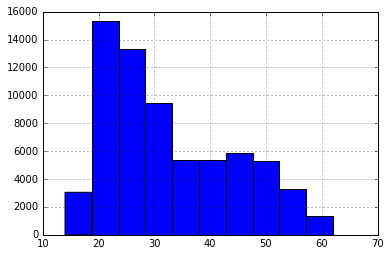

In [169]:
df.Age.hist()

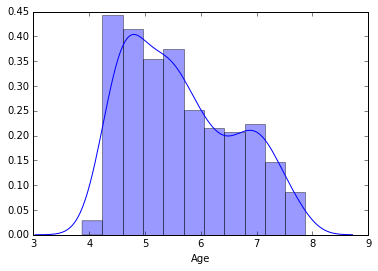

In [182]:
sns.distplot(np.sqrt(df.sample(frac=0.01).Age))

In [184]:
fi = Fitter(data=np.sqrt(df.sample(frac=0.01).Age),verbose=True)

In [185]:
fi.fit()

Fitted alpha distribution with error=13.9700692398)
Fitted anglit distribution with error=14.4591566922)
Fitted arcsine distribution with error=19.3916187342)
Fitted argus distribution with error=15.2834747605)
Fitted beta distribution with error=14.2230006359)
Fitted betaprime distribution with error=14.1180687227)
Fitted bradford distribution with error=14.3332642372)
Fitted burr distribution with error=13.8985512097)
Fitted burr12 distribution with error=13.8355325178)
Fitted cauchy distribution with error=14.8702244122)
Fitted chi distribution with error=13.6849472421)
Fitted chi2 distribution with error=22.0224323883)
Fitted cosine distribution with error=14.4717557809)
Fitted dgamma distribution with error=14.7778625082)
Fitted dweibull distribution with error=14.4826746378)
Fitted erlang distribution with error=13.6079855896)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 17.850000000000001.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 16.149999999999999.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 16.43333333333333.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 16.574999999999996.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution

Fitted expon distribution with error=15.4747972965)
Fitted exponnorm distribution with error=13.6178637973)
Fitted exponpow distribution with error=27.7571630297)
Fitted exponweib distribution with error=13.8197463263)
Fitted f distribution with error=13.859425258)
Fitted fatiguelife distribution with error=13.6618405406)
Fitted fisk distribution with error=13.8861614934)
Fitted foldcauchy distribution with error=14.3196866242)
Fitted foldnorm distribution with error=14.020761214)
Fitted frechet_l distribution with error=13.9675619004)
Fitted frechet_r distribution with error=13.6662832876)
Fitted gamma distribution with error=13.6079705804)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2595: RuntimeWarning: divide by zero encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


Fitted gausshyper distribution with error=14.3108653468)
Fitted genexpon distribution with error=13.5145980215)
Fitted genextreme distribution with error=13.9506698514)
Fitted gengamma distribution with error=13.8155971359)
Fitted genhalflogistic distribution with error=13.9522427459)
Fitted genlogistic distribution with error=13.963691971)
Fitted gennorm distribution with error=14.1779087407)
Fitted genpareto distribution with error=17.0449157474)
Fitted gilbrat distribution with error=13.8338979065)
Fitted gompertz distribution with error=13.9623675196)
Fitted gumbel_l distribution with error=15.1726620147)
Fitted gumbel_r distribution with error=13.9677189994)
Fitted halfcauchy distribution with error=15.1048047415)
Fitted halfgennorm distribution with error=14.081584279)
Fitted halflogistic distribution with error=14.3673797673)
Fitted halfnorm distribution with error=14.2139536264)
Fitted hypsecant distribution with error=14.6253144677)
Fitted invgamma distribution with error=13.8

In [188]:
fi.fitted_param['triang']

(0.11891974238218878, 3.9782874023967811, 4.1527886613961975)

In [191]:
sim = stats.triang.rvs(0.11891974238218878, 3.9782874023967811, 4.1527886613961975,size=len(df))

In [195]:
df['sim'] = sim*sim

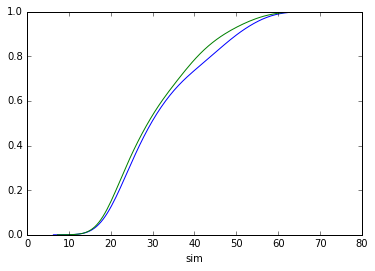

In [206]:
sns.distplot(df['Age'].sample(frac=0.01),hist=False,kde_kws=dict(cumulative=True))
sns.distplot(df['sim'].sample(frac=0.01),hist=False,kde_kws=dict(cumulative=True))
